## Working with text and sentiment (NLP)

### Preparing text dataframe

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter

In [3]:
Google_news=pd.read_csv('Google_news.csv')
Google_news.drop(columns=['Unnamed: 0','link','Ticker'], inplace=True)

### Cleaning

In [4]:
Head = Google_news['Head'].to_list()
Source = Google_news['source'].to_list()
for i in range(len(Source)):
    if Source[i] in Head[i]:
        Head[i] = Head[i].replace(Source[i], '')
Google_news['Head']=Head

In [105]:
Google_news_classic = Google_news[Google_news['marker']==0]
Google_news_crypto = Google_news[Google_news['marker']==1]

In [106]:
dates_classic = Google_news_classic['marker'].groupby(Google_news_classic['Date']).mean().index
dates_crypto = Google_news_crypto['marker'].groupby(Google_news_crypto['Date']).mean().index
dates_list_crypto=[]
for i in dates_crypto:
    if i not in dates_classic:
        dates_list_crypto.append(i)
dates_list_classic=[]
for i in dates_classic:
    if i not in dates_crypto:
        dates_list_classic.append(i)
dates_list=dates_list_crypto + dates_list_classic
list=[]
for i in Google_news['Date']:
    if i in dates_list:
        list.append(0)
    else:
        list.append(1)
Google_news['flag']=list
Google_news_final=Google_news[Google_news['flag']==1]
Google_news_final.drop(columns=['flag'],inplace=True)

#final news dataset where there are both crypto and classic news sources presented

### Text preprocessing

In [107]:
import nltk
import string
import re
import inflect
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

In [108]:
#first we need to lowercase text to reduce the size of the vocabulary of our text data
def text_lowercase(text):
    return text.lower()

#convert numbers to text
p = inflect.engine()
def convert_number(text):

    temp_str = text.split()

    new_string = []
 
    for word in temp_str:

        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
 
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

#remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

#removing whitespaces (if any)
def remove_whitespace(text):
    return  " ".join(text.split())

# removing stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

# stem words in the list of tokenized words (tokinized previously)

stemmer = PorterStemmer()
def stem_words(text):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in text]
    return stems

#no lemmatisation will be because stemmatisation is enough for our prob

In [109]:
Google_news_final['Head']=Google_news_final['Head'].apply(text_lowercase)
Google_news_final['Head']=Google_news_final['Head'].apply(convert_number)
Google_news_final['Head']=Google_news_final['Head'].apply(remove_punctuation)
Google_news_final['Head']=Google_news_final['Head'].apply(remove_whitespace)
#For word clouds
#Google_news_final['Head']=Google_news_final['Head'].apply(remove_stopwords)
#Google_news_final['Head']=Google_news_final['Head'].apply(stem_words)

In [78]:
#for wordclouds

In [48]:
Google_news_crypto_clouds=Google_news_final[Google_news_final['marker']==1].copy(deep=True)
Google_news_classic_clouds=Google_news_final[Google_news_final['marker']==0].copy(deep=True)


In [74]:
crypto_words_list=[]
for i in Google_news_crypto_clouds['Head']:
    for j in i:
        crypto_words_list.append(j)
Counter_crypto=Counter(crypto_words_list)
Counter_crypto.keys()
keys_crypto=[key for key in Counter_crypto.keys()]
value_crypto=[value for value in Counter_crypto.values()]

Wordcloud_crytpo={'keys_crypto':keys_crypto,'values':value_crypto}
Wordcloud_crytpo=pd.DataFrame(Wordcloud_crytpo)

In [76]:
classic_words_list=[]
for i in Google_news_classic_clouds['Head']:
    for j in i:
        classic_words_list.append(j)
Counter_classic=Counter(classic_words_list)
Counter_classic.keys()
keys_classic=[key for key in Counter_classic.keys()]
value_classic=[value for value in Counter_classic.values()]

Wordcloud_classic={'keys_crypto':keys_classic,'values':value_classic}
Wordcloud_classic=pd.DataFrame(Wordcloud_classic)

In [80]:
Wordcloud_crytpo.to_csv('Wordcloud_crytpo.csv')
Wordcloud_classic.to_csv('Wordcloud_classic.csv')

In [79]:
#for wordclouds

In [110]:
Google_news_crypto_drop=Google_news_final[Google_news_final['marker']==1].copy(deep=True)
Google_news_classic_drop=Google_news_final[Google_news_final['marker']==0].copy(deep=True)

### Sentiment 1: VADER

In [111]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 
# function to print sentiments of the sentence

def sentiment_scores(sentence, list_comp):
 
    # Create a SentimentIntensityAnalyzer object
    
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores
    
    sentiment_dict = sid_obj.polarity_scores(sentence)

    list_comp.append(sentiment_dict['compound'])
    

In [112]:
Setiment_comp_vader=[]


#crypto news

Crypto_news = Google_news_crypto_drop['Head'].to_list()

for i in Crypto_news:
  sentiment_scores(i,Setiment_comp_vader)

Google_news_crypto_drop['Sentiment_VADER_comp_crypto']=Setiment_comp_vader

In [113]:
#classic news
Setiment_comp_vader_classic=[]

Classic_news = Google_news_classic_drop['Head'].to_list()

for i in Classic_news:
  sentiment_scores(i,Setiment_comp_vader_classic)

Google_news_classic_drop['Sentiment_VADER_comp_classic']=Setiment_comp_vader_classic

In [116]:
Google_news_classic_drop['Date']=pd.to_datetime(Google_news_classic_drop['Date'])
Google_news_crypto_drop['Date']=pd.to_datetime(Google_news_crypto_drop['Date'])

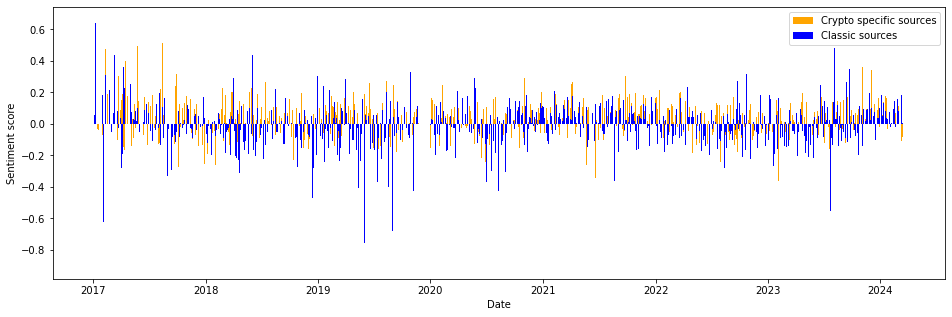

In [126]:
plt.figure(figsize=(16,5))

plt.xlabel('Date')
plt.ylabel('Sentiment score')
plt.bar(Google_news_classic_drop[Google_news_classic_drop['Date']>='2017-01-01']['Sentiment_VADER_comp_classic'].groupby(Google_news_classic_drop['Date']).mean().index, 
        Google_news_crypto_drop[Google_news_crypto_drop['Date']>='2017-01-01']['Sentiment_VADER_comp_crypto'].groupby(Google_news_crypto_drop['Date']).mean().values, 
        color='orange',label='Crypto specific sources')

plt.bar(Google_news_classic_drop[Google_news_classic_drop['Date']>='2017-01-01']['Sentiment_VADER_comp_classic'].groupby(Google_news_classic_drop['Date']).mean().index, 
        Google_news_classic_drop[Google_news_classic_drop['Date']>='2017-01-01']['Sentiment_VADER_comp_classic'].groupby(Google_news_classic_drop['Date']).mean().values, 
        color='blue',label='Classic sources')

plt.legend()

plt.locator_params(axis='x',nbins=7)

plt.savefig('sentiment.png', bbox_inches='tight')

plt.show()

#in fact for VADER it is better not to use text preprocessing

### Sentiment 2: TextBlob

In [24]:
from textblob import TextBlob

In [25]:
def textblob(text):
    text_analysis = text
    blob = TextBlob(text_analysis)
    sentiment = blob.sentiment
    return sentiment[0]

In [26]:
Google_news_crypto_drop['textblob_crypto']=Google_news_crypto_drop['Head'].apply(lambda x: textblob(x))

In [27]:
Google_news_classic_drop['textblob_classic']=Google_news_classic_drop['Head'].apply(lambda x: textblob(x))

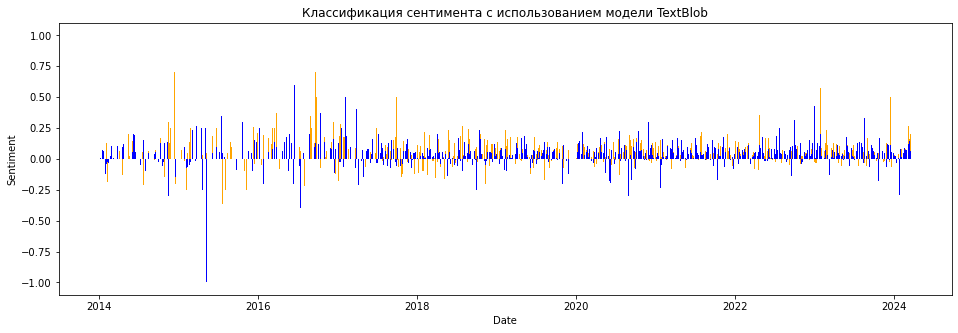

In [28]:
plt.figure(figsize=(16,5))


plt.title('Классификация сентимента с использованием модели TextBlob')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.bar(Google_news_crypto_drop['textblob_crypto'].groupby(Google_news_crypto_drop['Date']).mean().index, 
        Google_news_crypto_drop['textblob_crypto'].groupby(Google_news_crypto_drop['Date']).mean().values, 
        color='orange')

plt.bar(Google_news_classic_drop['textblob_classic'].groupby(Google_news_classic_drop['Date']).mean().index, 
        Google_news_classic_drop['textblob_classic'].groupby(Google_news_classic_drop['Date']).mean().values, 
        color='blue')


plt.locator_params(axis='x',nbins=7)

plt.show()

In [29]:
Google_news_classic_drop.to_csv('Google_news_classic_drop.csv')
Google_news_crypto_drop.to_csv('Google_news_crypto_drop.csv')